# **1. Perkenalan Dataset**
Sumber dataset (Kaggle): [Sumber_Dataset](https://www.kaggle.com/datasets/budincsevity/szeged-weather/data)

Dataset ini mencakup ringkasan harian/per jam untuk wilayah Szeged, Hongaria, antara tahun 2006 dan 2016. Data tersedia dalam respons per jam.

Kolom pada dataset:
- time
- summary
- precipType
- temperature
- apparentTemperature
- humidity
- windSpeed
- windBearing
- visibility
- loudCover
- pressure

# **2. Import Library**

In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **3. Memuat Dataset**

In [37]:
df = pd.read_csv("https://drive.google.com/uc?id=1I4EbHvbL6cJDYmqh3hMJkE6aGQrVQbyX")

# **4. Exploratory Data Analysis (EDA)**

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


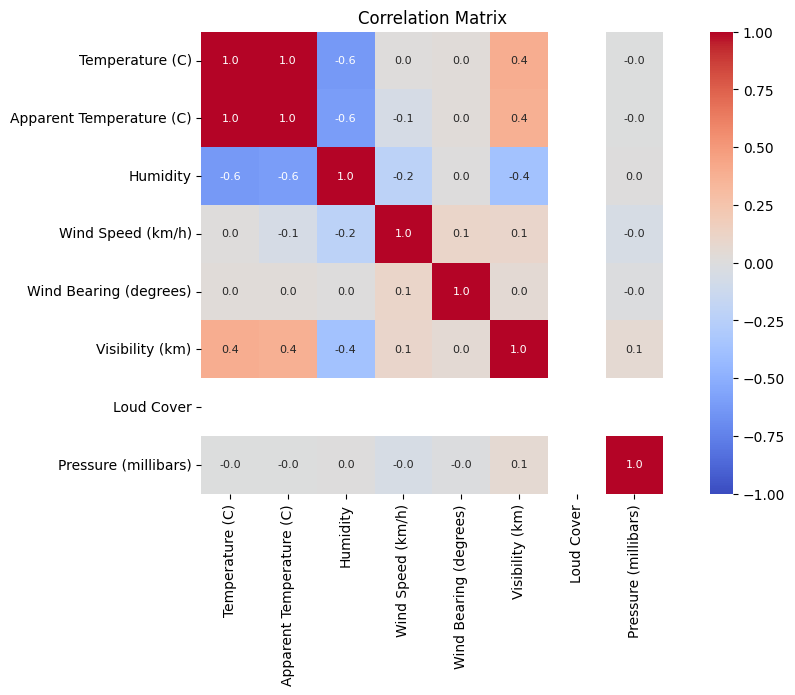

In [9]:
# Menampilkan heatmap korelasi pada kolom numerik dengan target

numeric_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize=(12, 6))
correlation_matrix = df[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True, fmt='.1f', annot_kws={'size':8})
plt.title('Correlation Matrix')
plt.show()

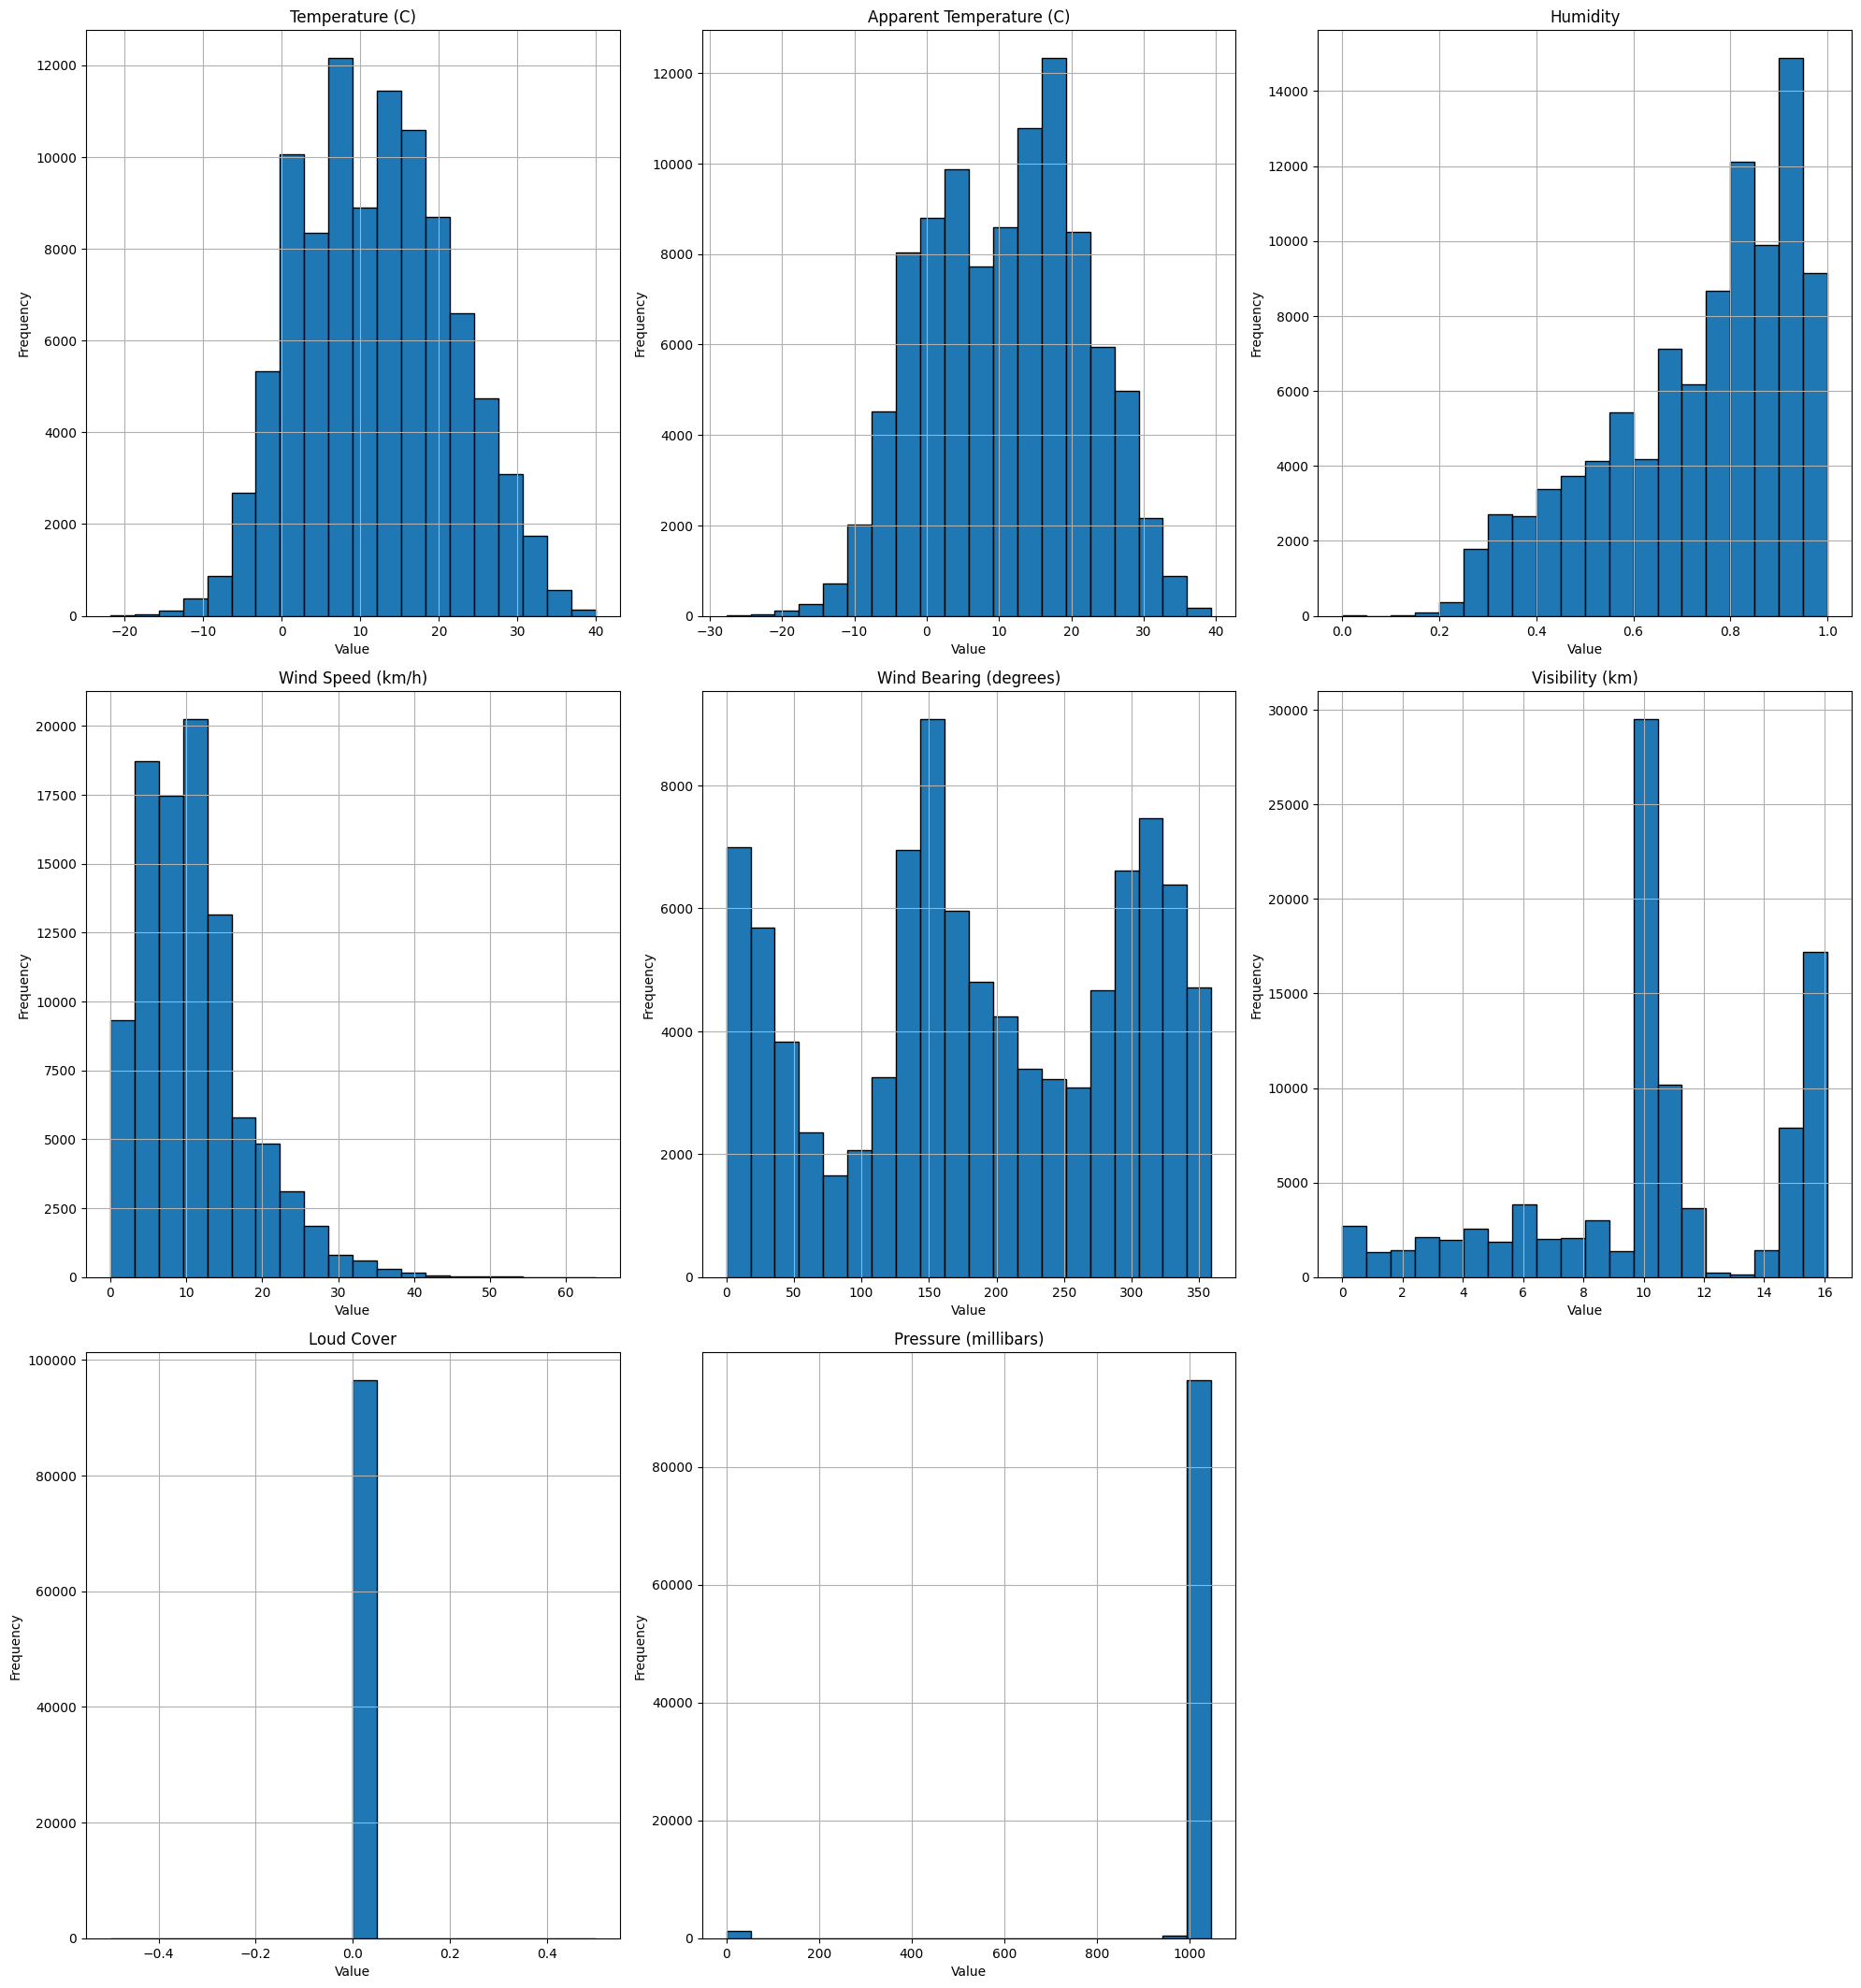

In [10]:
# Menampilkan histogram untuk semua kolom numerik

num_vars = df.shape[1]

n_cols = 3
n_rows = -(-num_vars // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 7))
axes = axes.flatten()

for i, column in enumerate(numeric_features):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6840\2415234109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Precip Type', data=df, palette=['blue', 'orange'])


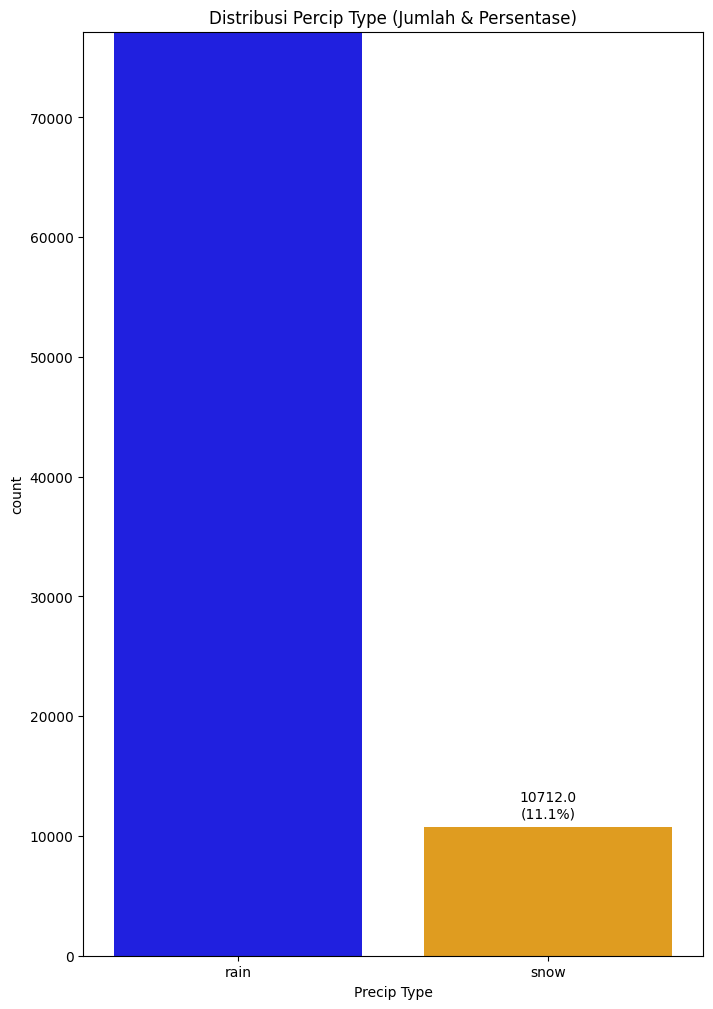

In [23]:
# Menampilkan histogram perbandingan kelas pada kolom kategorikal
plt.figure(figsize=(8, 12))
ax = sns.countplot(x='Precip Type', data=df, palette=['blue', 'orange'])

total = df.shape[0]

# Tambahkan label (jumlah & persentase) di atas hist
for container in ax.containers:
    # Membuat label
    labels = [f'{h}\n({h/total*100:.1f}%)' for h in container.datavalues]
    
    # Menempelkan label
    ax.bar_label(container, labels=labels, label_type='edge', padding=5)

# Merapikan judul dan label
plt.title('Distribusi Percip Type (Jumlah & Persentase)')
plt.ylim(0, total * 0.8) # Memberi ruang kosong di atas agar tulisan tidak terpotong
plt.show()

# **5. Data Preprocessing**

In [24]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Karena tidak ada data yang hilang, maka kode berikutnya tidak dipakai pada file ini.

In [25]:
missing_values = df[df.isna().any(axis=1)].index
len(missing_values)

517

karena total missing_values hanya 56/96000 data, maka missing values pada kasus ini dihapus.

In [38]:
# Menangani data yang hilang 
df = df.drop(missing_values)
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [30]:
# Melihat baris yang duplikat saja
df.duplicated().sum()

np.int64(24)

Data yang terduplikasi hanya berjumlah 24 dari total 96000 dataset. Maka data ini dihapus.

In [39]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.shape

(95912, 12)

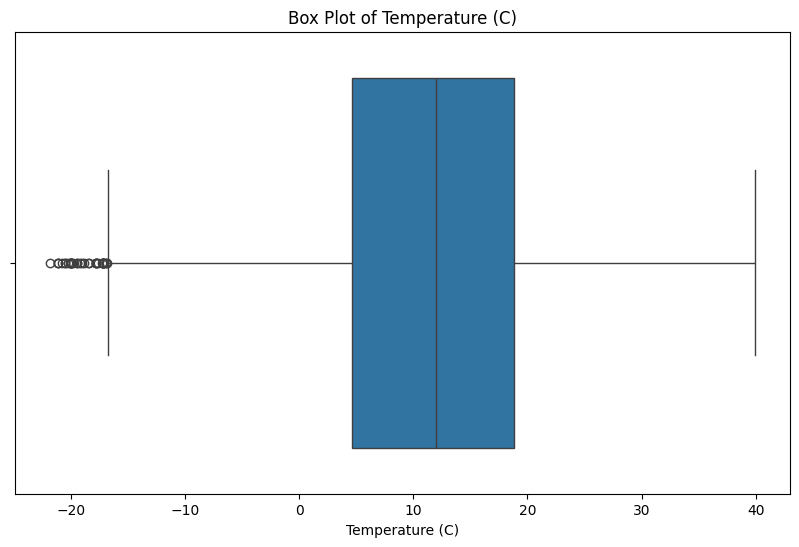

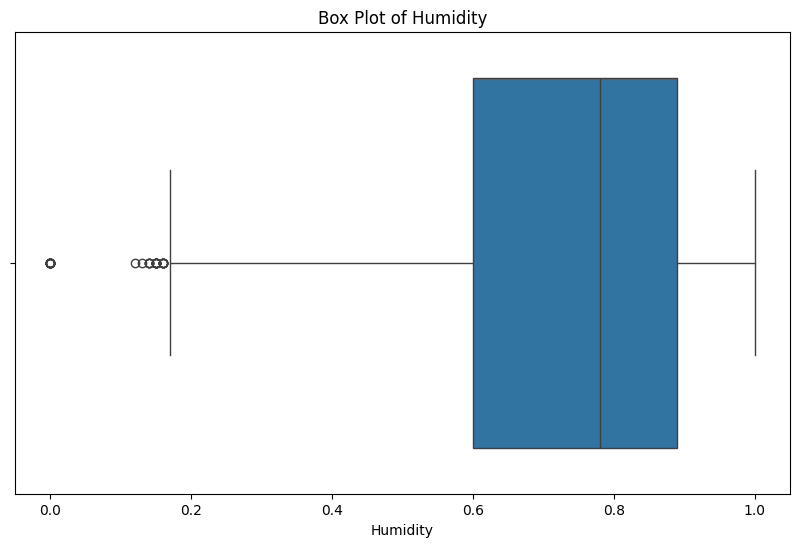

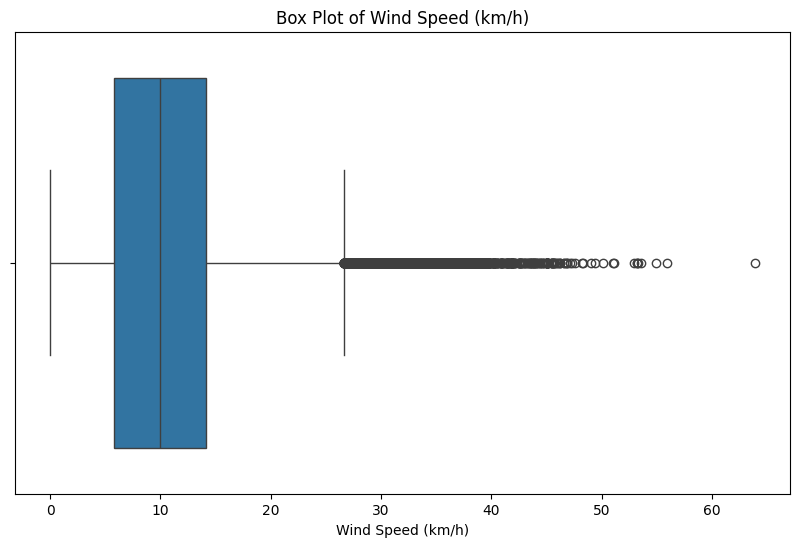

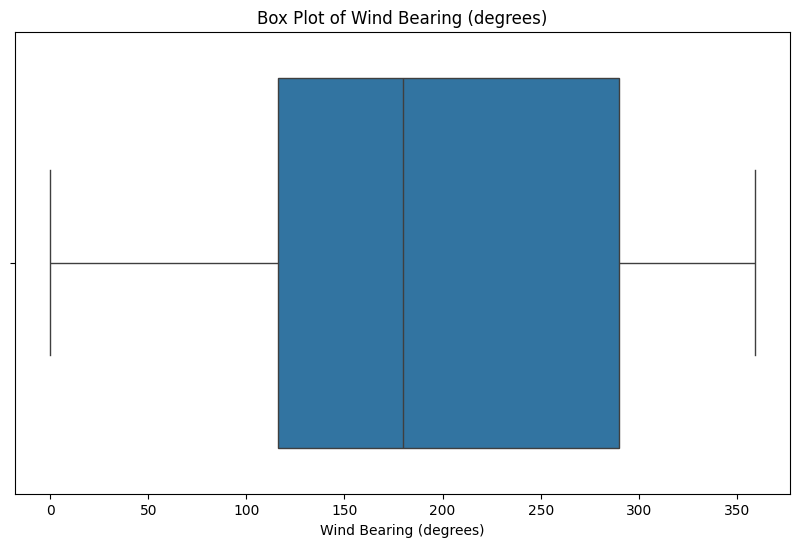

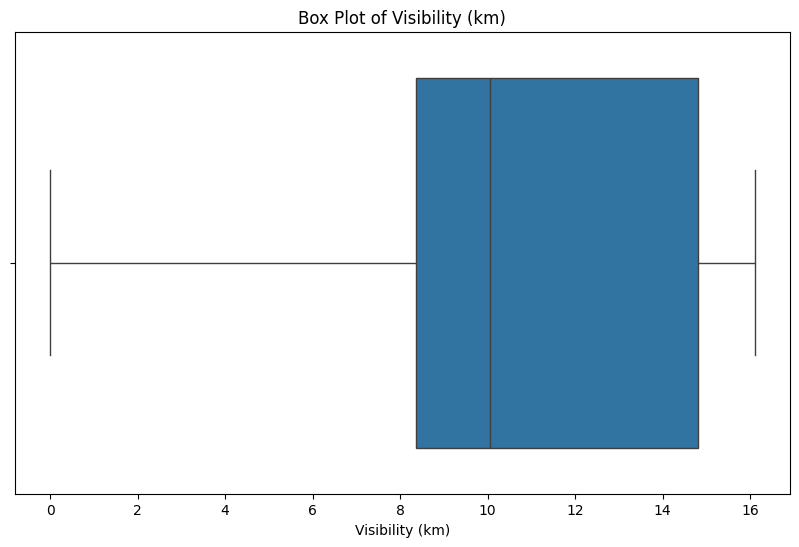

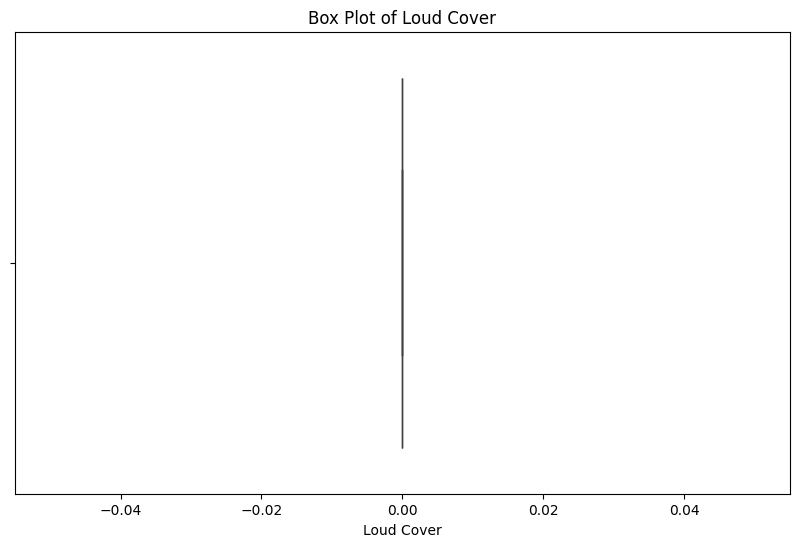

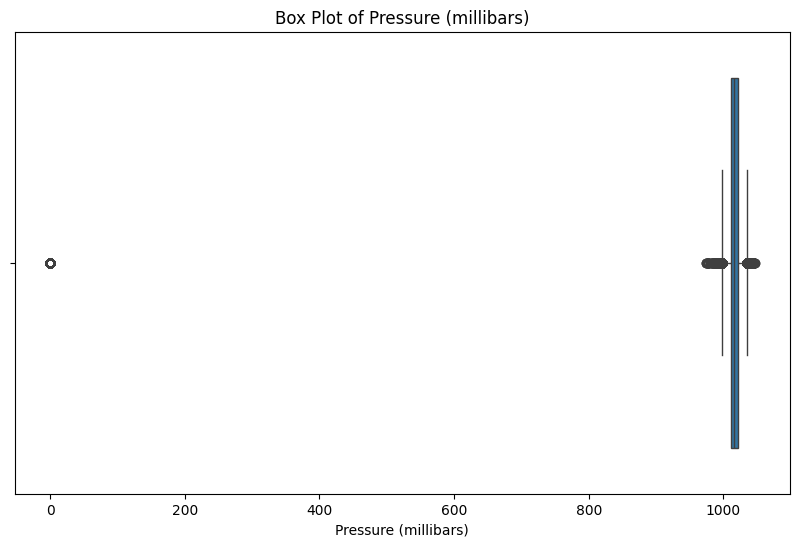

In [33]:
# Visualisasi bar chart untuk identifikasi outliers

numeric_features = df.drop(columns=['Apparent Temperature (C)']).select_dtypes(include=['number']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [34]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
# Menghitung persentase outlier per kolom
outlier_mask = (
    (df[numeric_features] < (Q1 - 1.5 * IQR)) |
    (df[numeric_features] > (Q3 + 1.5 * IQR))
)
outlier_ratio = outlier_mask.mean()
high_outlier_columns = outlier_ratio[outlier_ratio > 0.5].index.tolist()
summary = pd.DataFrame({
    "outlier_ratio": outlier_ratio,
    "outlier_percentage": outlier_ratio * 100
}).sort_values("outlier_ratio", ascending=False)

summary

,outlier_ratio,outlier_percentage
Pressure (millibars),0.046115,4.611519
Wind Speed (km/h),0.031393,3.139336
Humidity,0.000480,0.047961
Temperature (C),0.000407,0.040662
Wind Bearing (degrees),0.000000,0.000000
Visibility (km),0.000000,0.000000
Loud Cover,0.000000,0.000000


Pada dataset ini, data yang memiliki outliers < 10% dari keseluruhan dataset, sehingga outliers tidak dihapus

In [40]:
# Hapus kolom yang tidak penting
columns_to_drop = ['Formatted Date', 'Summary', 'Daily Summary', 'Loud Cover']
df = df.drop(columns=columns_to_drop)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [41]:
# Melakukan feature encoding untuk fitur kategorikal
df = pd.get_dummies(df, columns=['Precip Type'])
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,True,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,True,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,True,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,True,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,True,False


In [43]:
# Data splitting
X = df.drop('Apparent Temperature (C)', axis=1)
y = df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

(76729, 8) (19183, 8)


In [44]:
# Menghapus kolom yang saling berkorelasi satu sama lain, pada data latih dan data uji untuk mencegah multikolinieritas
def correlation_for_dropping(data, threshold):
    col_corr = set()  # Kumpulkan semua nama kolom yang berkorelasi
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # Dapatkan nama kolom
                col_corr.add(colname)
    return col_corr

In [45]:
correlation_for_dropping(X_train, 0.90)

{'Precip Type_snow'}

In [46]:
cols_to_drop = correlation_for_dropping(X_train, 0.9)
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)
X_test.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain
93007,9.988889,0.50,15.2950,271.0,10.1752,1018.70,True
95787,19.750000,0.74,7.7924,30.0,16.0517,1016.15,True
52496,22.300000,0.52,16.7923,149.0,9.9820,1013.82,True
43630,13.238889,0.85,13.8782,339.0,15.8263,1014.41,True
79369,10.066667,0.83,6.1663,220.0,16.1000,1010.39,True


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [54]:
# Membuat folder untuk menyimpan dataset setelah preprocessing
folder_name = "weather_preprocessing"
os.makedirs(folder_name, exist_ok=True)
X_train_final.to_csv(f"{folder_name}/train.csv", index=False)
X_test_final.to_csv(f"{folder_name}/test.csv", index=False)